In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from torch import nn

from unityagents import UnityEnvironment
from agent import PPOAgent
from trainer import PPOTrainer


In [2]:
# env = UnityEnvironment(file_name='/Users/claudcop/code/deep-rl/DeepRL_Continuous_Control/unity/Reacher.app', no_graphics=True)
env = UnityEnvironment(file_name='/Users/claudcop/code/deep-rl/DeepRL_Continuous_Control/unity/Reacher20.app', no_graphics=True)
agent = PPOAgent(env, network_config={'hidden_sizes':[256, 128], 'hidden_activation': nn.Tanh, 'action_std': 5e-1, single_network=True})
agent.policy.pi

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
INFO:agent:	------------------------------- Params -------------------------------
INFO:agent:	State dimension: 33	 Action dimension: 4	 Action Limit: 1.0
INFO:agent:	Agent Threads: 20
INFO:agent:	Network hidden units: [256, 128] -> Total hidden weights: 32768
INFO:agent:	Network hidden activations: <class 'torch.nn.modules.activation.Tanh'>
INFO:agent:	Network output activation: <class 't

Sequential(
  (0): Linear(in_features=33, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=4, bias=True)
  (5): Tanh()
)

/Users/claudcop/code/deep-rl/DeepRL_Continuous_Control/src/model/ppo/trainer.py:174: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(self.gae_lambda is not None, "If compute_general_advantage is set to True a gae_lambda value should be provided")
INFO:trainer:	------------------------------- Params -------------------------------
INFO:trainer:	Epsilon clip: 0.1	 Gamma: 0.99	 Learning Rate: 0.001
INFO:trainer:	Training epochs: 80 
INFO:trainer:	Using Normalized Advantage: True 
INFO:trainer:	Using General Advantage Estimation: True 
INFO:trainer:	----------------------------------------------------------------------
INFO:trainer:	------------------------------ Training ------------------------------
INFO:trainer:	N Episodes 2000 , max length episode: 700
INFO:trainer:	Update every 512 steps
INFO:trainer:	Print every 100 episodes
INFO:trainer:	Target score: 30.0
INFO:trainer:	----------------------------------------------------------------------




  0%|   

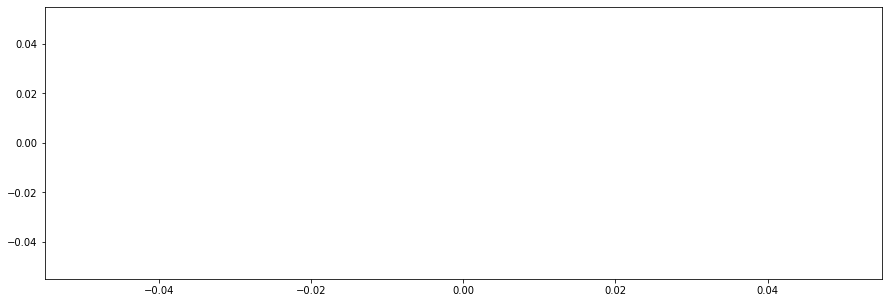

In [8]:
trainer = PPOTrainer(agent, gamma=0.99, epsilon_clip=0.1, training_epochs=80, use_generalized_advantage=True)
# trainer.toggle_debug()
scores = trainer.train(n_episodes=2000, max_t=700, update_every=512)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(scores)

plt.show()

In [1]:

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(scores)

plt.show()

NameError: name 'plt' is not defined

In [4]:
env_info = env.reset()['ReacherBrain']
brain = env.brains['ReacherBrain']
env_info

In [5]:
env_info.local_done

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [29]:
import numpy as np
# np.asarray([env_info.rewards,env_info.rewards]).mean(axis=0)
torch.from_numpy(np.asarray(env_info.rewards)[None, :]).float()

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
import torch 
N = torch.from_numpy(env_info.vector_observations).float()
agent.policy.pi(N)

tensor([[-0.2363, -0.1531, -0.2439, -0.0290],
        [-0.2345, -0.0924, -0.2172, -0.0463],
        [-0.2629, -0.3534,  0.1123,  0.2682],
        [-0.2383, -0.2260, -0.1019,  0.0894],
        [-0.2038, -0.1565, -0.2563, -0.0330],
        [-0.2740, -0.3695,  0.1242,  0.2764],
        [-0.3218, -0.0984, -0.0373,  0.0800],
        [-0.2432, -0.2218, -0.1244,  0.0557],
        [-0.2791, -0.2633, -0.2511,  0.0169],
        [-0.3791, -0.3011,  0.1292,  0.2890],
        [-0.2640, -0.3569,  0.1150,  0.2661],
        [-0.3533, -0.1612,  0.0267,  0.1711],
        [-0.2753, -0.2350, -0.2340,  0.0463],
        [-0.2337, -0.0570, -0.1903, -0.0530],
        [-0.2765, -0.2679, -0.2578,  0.0123],
        [-0.3709, -0.3632,  0.1578,  0.3364],
        [-0.2804, -0.2520, -0.2380,  0.0184],
        [-0.2379, -0.2264, -0.0976,  0.1017],
        [-0.2689, -0.0479, -0.1168, -0.0149],
        [-0.2365, -0.1986, -0.2596, -0.0121]], grad_fn=<TanhBackward>)

In [18]:
agent.policy.V(N)

tensor([[ 0.3624],
        [ 0.2837],
        [ 0.0255],
        [ 0.4153],
        [ 0.2939],
        [ 0.0290],
        [ 0.0224],
        [ 0.4754],
        [ 0.5638],
        [-0.0213],
        [ 0.0366],
        [-0.0022],
        [ 0.5459],
        [ 0.2173],
        [ 0.5595],
        [-0.0143],
        [ 0.5633],
        [ 0.3924],
        [ 0.1052],
        [ 0.4149]], grad_fn=<TanhBackward>)

In [13]:
for obs in env_info.vector_observations:
    print(obs[None,:])

[[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.90150833e+00 -1.00000000e+00
   1.25147629e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -5.22214413e-01]]
[[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.95617676e+00 -1.000

In [5]:
len(env_info.agents)

20

In [ ]:
agent.run_episode(200)

([tensor(1.00000e-20 *
         [ 6.9490]),
  tensor(1.00000e-23 *
         [ 3.9557]),
  tensor(1.00000e-26 *
         [ 7.3823]),
  tensor(1.00000e-26 *
         [ 4.6146]),
  tensor(1.00000e-24 *
         [ 5.8462]),
  tensor(1.00000e-23 *
         [ 5.9610]),
  tensor(1.00000e-22 *
         [ 7.2304]),
  tensor(1.00000e-18 *
         [ 1.5306]),
  tensor(1.00000e-17 *
         [ 3.6076]),
  tensor(1.00000e-16 *
         [ 5.7379]),
  tensor(1.00000e-18 *
         [ 1.2030]),
  tensor(1.00000e-19 *
         [ 1.1173]),
  tensor(1.00000e-22 *
         [ 1.1839]),
  tensor(1.00000e-25 *
         [ 3.8378]),
  tensor(1.00000e-20 *
         [ 3.0209]),
  tensor(1.00000e-16 *
         [ 3.0920]),
  tensor(1.00000e-18 *
         [ 3.7784]),
  tensor(1.00000e-16 *
         [ 1.8243]),
  tensor(1.00000e-13 *
         [ 3.4179]),
  tensor(1.00000e-11 *
         [ 1.5415]),
  tensor(1.00000e-11 *
         [ 1.2779]),
  tensor(1.00000e-12 *
         [ 3.5160]),
  tensor(1.00000e-13 *
         

In [ ]:
trainer.agent.policy.save_model('./checkpoint.pth')

In [ ]:
PPOAgent.from_file(env, './checkpoint.pth')

TypeError: __init__() got an unexpected keyword argument 'action_std'